In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pylab as plt
import operator
import pandas as pd
from prettytable import PrettyTable
from scipy.interpolate import make_interp_spline
from sklearn.model_selection import train_test_split

# a) Random Initialization


In [2]:
np.random.seed(9)
x_plot_data = np.linspace(0, 1, 20).reshape((-1,1))
no_of_samples = 20
X = np.random.uniform(0, 1, size=no_of_samples)[:, np.newaxis]
N = np.random.normal(scale=0.3 , size=no_of_samples )[:, np.newaxis]
Y = np.sin(2*np.pi*X) + N
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.5)

## b) Using root mean square error, find weights of polynomial regression for order is 0, 1, 3, 9


In [3]:

def Lin(X,Y,Input , degree = 0 ):
    
    polynomial_features= PolynomialFeatures(degree=degree)
    X_P = polynomial_features.fit_transform(X)
    polynomial_features.fit(X_P,Y)
    model = LinearRegression()
    fit = model.fit(X_P,Y)
    X_p_plot = polynomial_features.fit_transform(Input)
    Y_pred = model.predict(X_p_plot)
    
    return Y_pred , np.array(fit.coef_)


def Plot(x,y):
    plt1 = plt.gca()
#     plot(x_plot, np.sin(2*np.pi*x_plot), color='green')
    # sort the values of x before line plot
    plt1.scatter(X_Train, Y_Train, s=10)
    plt1.plot(x, np.sin(2*np.pi*x), color='green')
    plt1.plot(x, y, color='r')
    plt1.set_ylim((-2, 2))
    plt1.set_xlim((0, 1))
    plt1.set_ylabel('y')
    plt1.set_xlabel('x')
    plt.show()


In [4]:
Y_pred_0 ,coef_0 = Lin(X_Train,Y_Train,x_plot_data,0)
Y_pred_1 ,coef_1 = Lin(X_Train,Y_Train,x_plot_data,1)
Y_pred_3 ,coef_3 = Lin(X_Train,Y_Train,x_plot_data,3)
Y_pred_9 ,coef_9 = Lin(X_Train,Y_Train,x_plot_data,9)


## c) Display weights in table 


In [5]:
x = PrettyTable()
x.field_names = ["W" ,"M=0", "M=1", "M=3", "M=9"]
x.add_row(["w0",coef_0[0][0],coef_1[0][0],coef_3[0][0],coef_9[0][0]])
x.add_row(["w1"," " ,coef_1[0][1],coef_3[0][1],coef_9[0][1]])
x.add_row(["w2"," " ," ",coef_3[0][2],coef_9[0][2]])
x.add_row(["w3"," " ," ",coef_3[0][3],coef_9[0][3]])
x.add_row(["w4"," " ," "," ",coef_9[0][4]])
x.add_row(["w5"," " ," "," ",coef_9[0][5]])
x.add_row(["w6"," " ," "," ",coef_9[0][6]])
x.add_row(["w7"," " ," "," ",coef_9[0][7]])
x.add_row(["w8"," " ," "," ",coef_9[0][8]])
x.add_row(["w9"," " ," "," ",coef_9[0][9]])
print(x)

+----+-----+---------------------+--------------------+---------------------+
| W  | M=0 |         M=1         |        M=3         |         M=9         |
+----+-----+---------------------+--------------------+---------------------+
| w0 | 0.0 |         0.0         |        0.0         |         0.0         |
| w1 |     | -1.7394900387913543 | 18.22201795389494  |  2430.427797048299  |
| w2 |     |                     | -45.50292100808727 | -35946.922590644244 |
| w3 |     |                     | 28.14190350871148  |  258893.87668232384 |
| w4 |     |                     |                    | -1053541.1107166202 |
| w5 |     |                     |                    |  2590907.3885073983 |
| w6 |     |                     |                    | -3929899.0030294927 |
| w7 |     |                     |                    |  3595884.1833787835 |
| w8 |     |                     |                    | -1819709.3982097625 |
| w9 |     |                     |                    |  391063.

## d) Draw a chart of fit data

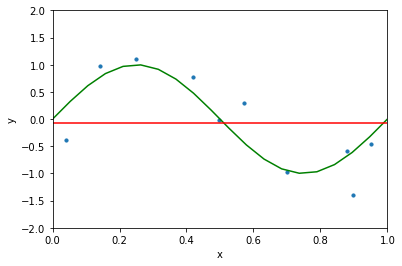

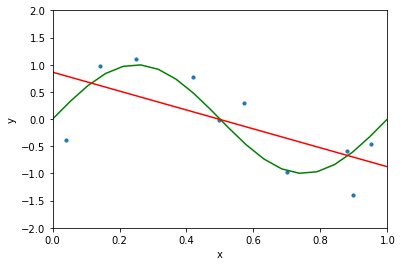

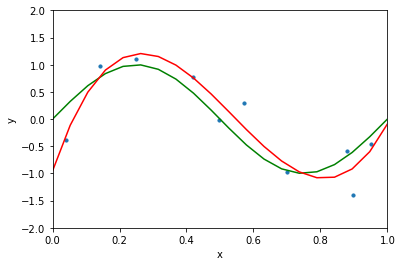

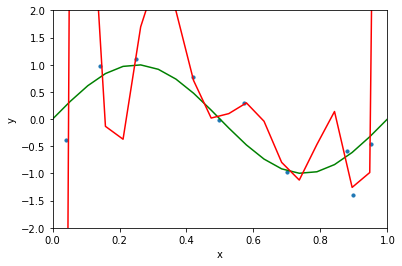

In [6]:
Plot(x_plot_data,Y_pred_0)
Plot(x_plot_data,Y_pred_1)
Plot(x_plot_data,Y_pred_3)
Plot(x_plot_data,Y_pred_9)

## e) Draw train error vs test error

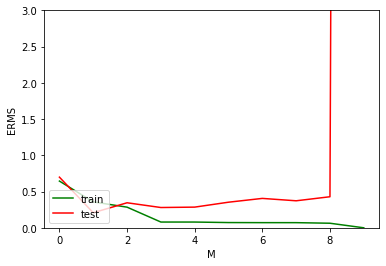

In [7]:
train_error = np.empty(10)
test_error = np.empty(10)

for degree in range(10):
    
    polynomial_features= PolynomialFeatures(degree=degree)
    X_P = polynomial_features.fit_transform(X_Train)
    model = LinearRegression()
    fit = model.fit(X_P,Y_Train)
    
    train_error[degree] = mean_squared_error(Y_Train ,model.predict(polynomial_features.fit_transform(X_Train)))
    
    test_error[degree] = mean_squared_error(Y_Test,model.predict(polynomial_features.fit_transform(X_Test)))
    

plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 3e0))
plt.ylabel('ERMS')
plt.xlabel('M')
plt.legend(loc='lower left')

## f) Now generate 100 more data and fit 9th order model and draw fit

In [8]:
np.random.seed(9)
x_plot_data2 = np.linspace(0, 1, 20).reshape((-1,1))
no_of_samples = 100
X2 = np.random.uniform(0, 1, size=no_of_samples)[:, np.newaxis]
N2 = np.random.normal(scale=0.3 , size=no_of_samples )[:, np.newaxis]
Y2 = np.sin(2*np.pi*X2) + N2


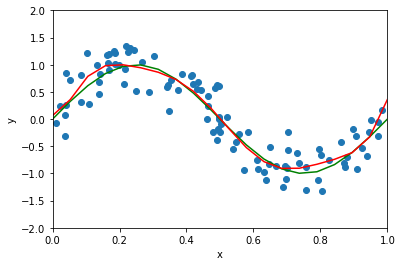

In [13]:
    
polynomial_features= PolynomialFeatures(degree=9)
X_P = polynomial_features.fit_transform(X2)
polynomial_features.fit(X_P,Y2)
model = LinearRegression()
fit = model.fit(X_P,Y2)
X_p_plot = polynomial_features.fit_transform(x_plot_data2)
Y_pred = model.predict(X_p_plot)
    
plt2 = plt.gca()

plt2.scatter(X2, Y2)
plt2.plot(x_plot_data2, np.sin(2*np.pi*x_plot_data2), color='green')
plt2.plot(x_plot_data2, Y_pred, color='r')
plt2.set_ylim((-2, 2))
plt2.set_xlim((0, 1))
plt2.set_ylabel('y')
plt2.set_xlabel('x')
plt.show()

## g) Now we will regularize using the sum of weights. 

In [14]:
degree = 9
alphas = [1.0, 1/10, 1/100,  1/1000, 1/10000, 1/100000]

## h) Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 


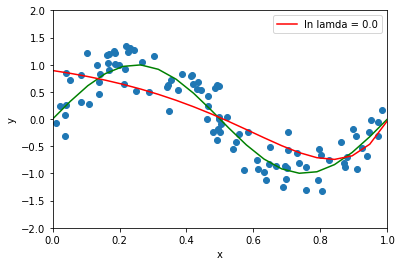

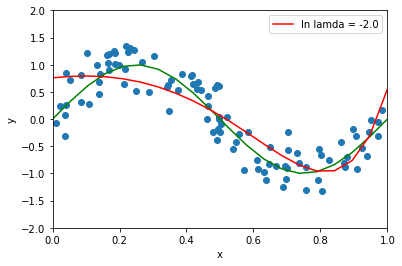

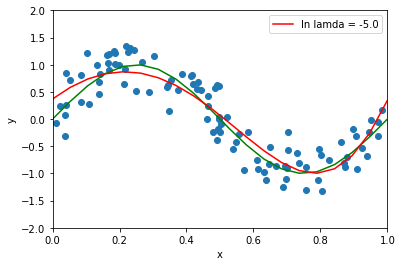

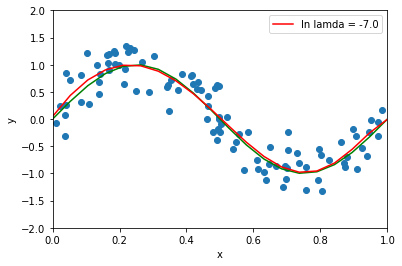

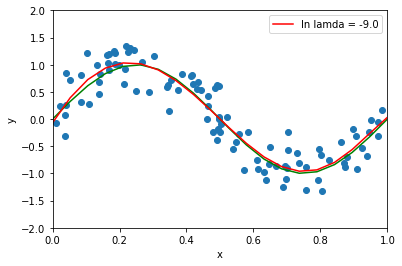

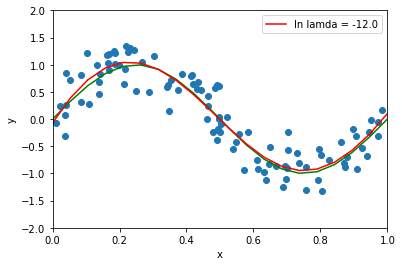

In [15]:
for alpha in alphas:
    polynomial_features= PolynomialFeatures(degree=9)
    X_P = polynomial_features.fit_transform(X2)
    polynomial_features.fit(X_P,Y2)
    model = Ridge(alpha=alpha)
    fit = model.fit(X_P,Y2)
    X_p_plot = polynomial_features.fit_transform(x_plot_data2)
    Y_pred = model.predict(X_p_plot)
    plt2 = plt.gca()

    plt2.scatter(X2, Y2)
    plt2.plot(x_plot_data2, np.sin(2*np.pi*x_plot_data2), color='green')
    plt2.plot(x_plot_data2, Y_pred, color='r',label="ln lamda = "+str(np.around(np.log(alpha))))
    plt2.set_ylim((-2, 2))
    plt2.set_xlim((0, 1))
    plt2.set_ylabel('y')
    plt2.set_xlabel('x')
    plt2.legend(loc='upper right')
    
    plt.show()
    

## i) Now draw test  and train error according to lamda 

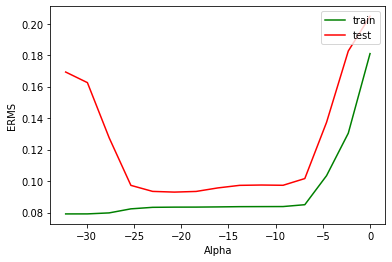

In [12]:
X2_Train, X2_Test, Y2_Train, Y2_Test = train_test_split(X2, Y2, test_size=0.5)
train_error1 = []
test_error1 = []
alphas = [1.0, 1/10, 1/100,  1/1000, 1/10000, 1/100000, 1/1000000,1/10000000,1/100000000,1/1000000000,1/10000000000,1/100000000000,1/1000000000000,1/10000000000000,1/100000000000000]

for alpha in alphas:
    polynomial_features= PolynomialFeatures(degree=9)
    X_P = polynomial_features.fit_transform(X2_Train)
    model = Ridge(alpha=alpha)
    fit = model.fit(X_P,Y2_Train)
    
    train_error1.append(mean_squared_error(Y2_Train ,model.predict(polynomial_features.fit_transform(X2_Train))) ) 
    
    test_error1.append(mean_squared_error(Y2_Test,model.predict(polynomial_features.fit_transform(X2_Test))))

plt.plot(np.log(alphas), train_error1, color='green', label='train')
plt.plot(np.log(alphas), test_error1, color='red', label='test')

plt.ylabel('ERMS')
plt.xlabel('Alpha')
plt.legend(loc='upper right')


## j) Based on the best test performance, what is your model?

Based on the best test performance my model is a ridge classifier that uses a regularized linear regression. I have used ridge classifier provided by sckit-learn. For my case the log(alpha) = -25 is the best model after that the testing error starts increasing. For unregularized regression after M = 1 the error has increased and for M = 9 the data starts overfitting.